Import Data

# Entering the Movie Industry

**Authors:** Lhamu Tsering, Justin Fernandez
***

## Overview

## Business Problem
Microsoft wants to join in on the other big companies starting to make video content like Netflix, Amazon Prime Video, and many others. Without much experience in the field, they need our help with getting an insight into what they should be creating to be the most successful. 

The questions that we seek to answer are:
1. What genre of movie is the most successful domestically / worldwide?
2. Who should be hired to give the highest chance of a highly rated movie?


The reason we seek to anser those questions:
1. For a new company a couple unncessful movie could be the demise of their brand a chance of making it in the market. By creating movies with genres that appeal to the most people you give yourself the highest chance of a positive return on investment.
2. Some actors, directors, and others on the movie set are better than others. Hiring those who a part of highly rated movies gives you better chance of creating a good movie.


**FROM TEMPLATE**

Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?

**FROM TEMPLATE**
***

## Data Understanding

The data used in this project comes from websites that specialize in movies/tv-shows and all information on those. The websites are Box Office Mojo, IMDb, Rotten Tomatoes, and TheMovieDB.org. In order to get a better understanding I am going to highlight the key components of each dataset.
1. **imdb.title.crew.csv.gz** - This contains the directors and writers for 146,000 movies. (146144 rows × 3 columns)
2. **tmdb.movies.csv.gz** - This conains IMDb information like rating, popularity, and id. Along with that it also has the genres, release date, and title. (26517 rows × 10 columns)
3. **imdb.title.akas.csv.gz** - This contains the titles used in other countries. (331703 rows × 8 columns)
4. **imdb.name.basics.csv.gz** - This contains the employess of the movie and their specfic role. (606648 rows × 6 columns)
5. **rt.reviews.tsv.gz** - This contains the reiews given on Rotten Tomatoes as well as the information about the reviewer. (54432 rows × 8 columns)
6. **imdb.title.basics.csv.gz** - This contains the general infomation on a movie like start year, runtime, and genres. (146144 rows × 6 columns)
7. **rt.movie_info.tsv.gz** - This contains the general information that Rotten Tomatoes provides. This includes a synopsis, rating, genre, directors, and much more. (1560 rows × 12 columns)
8. **tn.movie_budgets.csv.gz** - This contains the budget and gross income. (5782 rows × 6 columns)
9. **bom.movie_gross.csv.gz** - This contains the domestic and foreign gross. (3387 rows × 5 columns)
10. **imdb.title.principals.csv.gz** - This contains information on actors and the movies they were in. (1028186 rows × 6 columns)

In order to answer question one, I will be using the **tmdb.movies.csv.gz** and **bom.movie_gross.csv.gz**. The reason for the **tmdb.movies.csv.gz** dataset is to access all movie titles along with their genre ids. The **bom.movie_gross.csv.gz** dataest will be used to access the domestic box office for every movie in that dataset. These two splices of the dataset will be combined to show the domestic box office per movie whihc will then be further processed to show box office based on genre.

In order to answer question two, I will be using the **imdb.name.basics.csv.gz** and **imdb.title.ratings.csv.gz**. The **imdb.name.basics.csv.gz** will be used to access all the employees of movies along with their respective titles they are most known for. The **imdb.title.ratings.csv.gz** will be used to asign ratings to the movies that the employees are most known for. This will allow me to rank players based off the ratings of their most known movie.

***
**FROM TEMPLATE**

Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?

**FROM TEMPLATE**
***

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [17]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [18]:
# Here you run your code to model the data

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

# ------------------------------------------------------

In [19]:
# Importing os for getting path names for data
import os
# Importing pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
data_path = os.path.join('data','zippedData')
files = os.listdir(data_path)

In [21]:
import_paths = [os.path.join(data_path,file) for file in files]

In [23]:
data = {}
for path in import_paths:
    try:
        df = pd.read_csv(path) #this will fail on the .tsv
    except:
        df = pd.read_csv(path,delimiter='\t', encoding='unicode_escape')
    data[path.split('/')[-1]] = df

In [63]:
data.keys()

dict_keys(['imdb.title.crew.csv.gz', 'tmdb.movies.csv.gz', 'imdb.title.akas.csv.gz', 'imdb.title.ratings.csv.gz', 'imdb.name.basics.csv.gz', 'rt.reviews.tsv.gz', 'imdb.title.basics.csv.gz', 'rt.movie_info.tsv.gz', 'tn.movie_budgets.csv.gz', 'bom.movie_gross.csv.gz', 'imdb.title.principals.csv.gz'])

# Looking into a new idea

data['rt.movie_info.tsv.gz'] - has movie ids that could be used to suplement other dataset

data['tn.movie_budgets.csv.gz'] - has domestic and worldwide gross

# All movie data sets imported in to variable 'data'

## (1) Looking at the idea of comparing the gross income from domestic and foreign based on the genre that movie has been classified as from bom.movie_gross.csv.gz'

The first question that I seek to answer is what genre of movie makes the most money. Of course Microsoft is a company and they seek to make the most money. Knowing what kind of movie allows you to make the most money on average gives the best chance of a movie making profit.

The first step in this process was to isolate the data needed to answer this question. The first data set is from IMDB where each row contains the title of the movie along with a list of genre's. The second data set is from Box Office Mojo containing the title of a movie as well as the total domestic gross box office.

The final dataframe that I am going to analyze are these two data sets joined by title to have the genre and total box office income for every movie.

In [53]:
#getting movie title and genre from the df
id_df = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]
#changing column title to be the same with other df
id_df.rename(columns={'original_title':'title'},inplace=True)
#getting the title and gross into sep df
money_df = data['bom.movie_gross.csv.gz'].loc[:,['title','domestic_gross']]
#merging the movie info with the gross income info
money_id_df = money_df.merge(id_df,how='left',on='title') 
#dropping duplicate titles that had wrong id's
money_id_df.drop_duplicates(subset='title',inplace = True)
#getting rid of movies that do not have genres
money_id_df.dropna(subset=['genre_ids'],inplace=True)
# dropping columns that do no have domestic_gross
money_id_df.dropna(subset=['domestic_gross'],inplace=True)

Now that the data is cleaned and stored I am going to change all genre ID's into the genre that they represent.

In [54]:
genre_id_to_string = {28:'action',
                      16:'animated',
                      99:'documentary',
                      18:'drama',
                      10751:'family',
                      14:'fantasy',
                      36:'history',
                      35:'comedy',
                      10752:'war',
                      80:'crime',
                      10402:'music',
                      9648:'mystery',
                      10749:'romance',
                      878:'sci-fi',
                      27:'horror',
                      10770:'TV-movie',
                      53:'thriller',
                      37:'western',
                      12:'adventure'}

In [55]:
def convert_id_to_name(id_list):
    id_list = id_list[1:-1].replace(',','').split()
    for id in enumerate(id_list):
        id_list[id[0]] = genre_id_to_string[int(id[1])]
    return(id_list)

In [56]:
# applying convert_id_to_name so that the ids are now readable names
money_id_df.genre_ids = money_id_df.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))
#dictionary to hold the following key value pairs:
# key = genre, value = total money grossed
money_for_each_genre = {}
for genre_money in money_id_df.iterrows():
    ids = list(genre_money[1])[-1]
    money = list(genre_money[1])[-2]
    if ids != 'nan':
        for id in ids:
            if id in money_for_each_genre.keys():
                money_for_each_genre[id].append(money) 
            else:
                money_for_each_genre[id] = [money]
# going through dictionary to take the mean of all movies in a genre
for genre_money in money_for_each_genre.items():
    money_list = genre_money[1]
    money_for_each_genre[genre_money[0]] = int(np.mean(money_list))
# converting back to dataframe for easy sorting / extraction for graphing
final_dataframe = pd.DataFrame.from_dict(money_for_each_genre,orient='index')
final_dataframe.sort_values(by=0,ascending=False,inplace=True)

Text(0, 0.5, 'Gross Domestic Box Office')

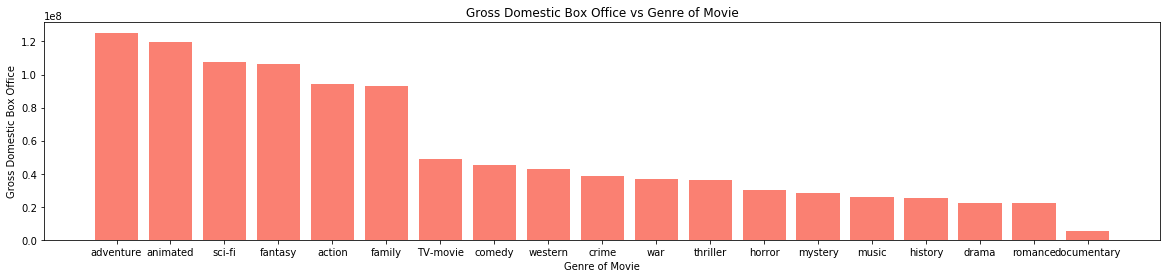

In [57]:
x = final_dataframe.index
y = final_dataframe.iloc[:,0]
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='salmon')
ax.set_title('Gross Domestic Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Domestic Box Office')


box and wisker showing each id

## (2) Looking at different data sets gross income

for item in data:
    print(item)

In [60]:
# get the gross income from domestic and worldwide
tn_money = data['tn.movie_budgets.csv.gz']
tn_money.rename(columns={'movie':'title'},inplace=True)
# get the genre ids
imdb_movies = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]
imdb_movies.rename(columns={'original_title':'title'},inplace=True)
# merge the two cells on title
money_for_movies = imdb_movies.merge(tn_money,how='left',on='title') 
# select wanted data
money_for_movies = money_for_movies.loc[:,['title','genre_ids','domestic_gross','worldwide_gross']]
# drop columns without a domestic gross
money_for_movies.dropna(subset=['domestic_gross'],inplace=True)
# clean the money columns due to $ and ,
def clean_money(money):
    money = money.replace('$','')
    return float(money.replace(',',''))
# cleaning both money columns
money_for_movies.domestic_gross = money_for_movies.domestic_gross.apply(lambda x: clean_money(x))
money_for_movies.worldwide_gross = money_for_movies.worldwide_gross.apply(lambda x: clean_money(x))
# creating a new column containing total gross income
money_for_movies['total_gross'] = money_for_movies.domestic_gross + money_for_movies.worldwide_gross
# converting genre ids to genres
money_for_movies.genre_ids = money_for_movies.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))
# adding money together by genre
world_money = {}
for item in money_for_movies.iterrows():
    ids = list(item[1])[1]
    money = list(item[1])[-1]
    if ids != 'nan':
        for id in ids:
            if id in world_money.keys():
                world_money[id].append(money)
            else:
                world_money[id] = [money]
# going through dictionary to take the mean of all movies in a genre
for money_genre in world_money.items():
    money_list = money_genre[1]
    world_money[money_genre[0]] = int(np.mean(money_list))
# creating a DataFrame from the dictionary
output_dataframe = pd.DataFrame.from_dict(world_money, orient='index')
# sorting value based on total box office income
output_dataframe.sort_values(by=0,ascending=False,inplace=True)

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Gross Domestic Box Office')

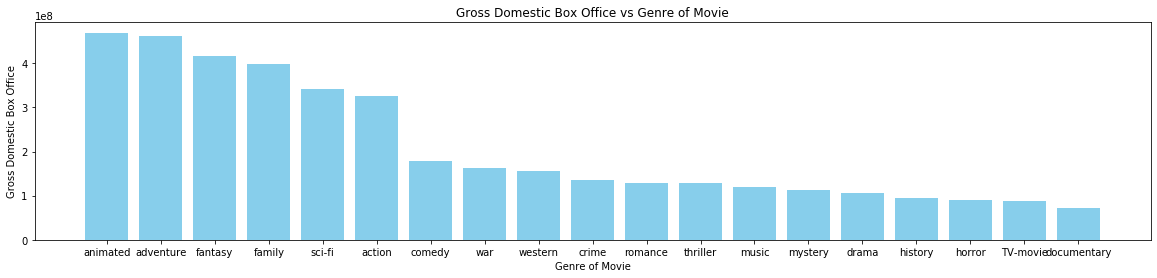

In [62]:
x = output_dataframe.index
y = output_dataframe.iloc[:,0]
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='skyblue')
ax.set_title('Gross Domestic Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Domestic Box Office')


# (3) new question to answer


In [43]:
movie_rating = data['imdb.title.ratings.csv.gz'][['tconst','averagerating']]

In [44]:
movie_rating.set_index('tconst',inplace=True)

In [45]:
tconst_to_rating = movie_rating.to_dict('index')

In [46]:
best_people = data['imdb.name.basics.csv.gz'].dropna(subset=['known_for_titles'])

In [47]:
def change_to_name(tconst_string): #x going to be a string 'tt0837562,tt2398241,tt0844471,tt0118553'
    tconst_list = tconst_string[1:-1].split(',')
    rating_list = []
    for tconst in tconst_list:
        try:
            rating_list.append(tconst_to_rating[tconst]['averagerating'])
        except:
            pass
    #return rating_list
    if len(rating_list)>0:
        return np.mean(rating_list)
    else:
        return np.nan

In [48]:
change_to_name('tt0837562,tt2398241,tt0844471,tt0118553')

6.0

In [49]:
best_people['average_rating'] = best_people.known_for_titles.apply(lambda x: change_to_name(x))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
best_people.dropna(subset=['average_rating'],inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
best_people.sort_values('average_rating',ascending=False)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,average_rating
574129,nm9216212,Louis Jay Jordan,NaN,NaN,actor,"tt8862866,tt7259300,tt8332802,tt7986092",10.0
260117,nm3704168,Michiel Brongers,NaN,NaN,"director,writer","tt2203394,tt6295832,tt1549132,tt1820401",10.0
497819,nm9219333,Mark Alan Campbell,NaN,NaN,actor,"tt7282046,tt7227500,tt8844124,tt7710186",10.0
483189,nm6680574,Brian Baucum,NaN,NaN,"camera_department,writer,editorial_department","tt3915326,tt4960818,tt8358508,tt8299862",10.0
519618,nm8791543,Emre Oran,NaN,NaN,"art_director,director,writer","tt8792694,tt7259300,tt6206180",10.0
...,...,...,...,...,...,...,...
323146,nm4956040,Kôji Isayama,NaN,NaN,actor,"tt2075560,tt5287132,tt3709556,tt1670662",1.0
342964,nm3819224,Luke Heaney,NaN,NaN,actor,"tt1608596,tt1926214,tt2142714",1.0
162591,nm3086131,Gyô Miyamoto,NaN,NaN,actor,"tt0369087,tt3262718,tt1804543",1.0
415012,nm5303822,Yoshitaka Hosokawa,NaN,NaN,actor,"tt2431396,tt3588050,tt5452328,tt7847476",1.0


In [ ]:
test_return

In [ ]:
jobs = data['imdb.name.basics.csv.gz']

job_dict = {}

jobs.dropna(subset=['primary_profession'],inplace=True)

for item in jobs.primary_profession:
    try:
        job_list = item.split(',')
    except:
        print(item)
    for job in job_list:
        if job in job_dict.keys():
            job_dict[job] +=1
        else:
            job_dict[job] = 1

x_job = []
y_job = []
for item in sorted(job_dict, key=job_dict.get):
    x_job.append(item)
    y_job.append(job_dict[item])

In [ ]:
fig_job = plt.figure(figsize=(8,10))
plt.barh(x_job,y_job)


In [ ]:
data.keys

In [ ]:
data['imdb.title.ratings.csv.gz']

Look at what words are in good reviews and what words are in bad reviews

In [ ]:
df = data['rt.reviews.tsv.gz']
df['fresh_number'] = df['fresh'].apply(lambda x: 0 if x=='rotten' else 1)
fresh_perc = df.groupby('id')['fresh_number'].mean()
fresh_perc